
## Pandas, Matplotlib и Seaborn

Seaborn — основанная на Matplotlib библиотека, предназначенная для визуализации данных. Она предоставляет высокоуровневый интерфейс (на языке Python) для изображения привлекательных и информативных статистических графических изображений (attractive and informative statistical graphics).

Для рисунков важна привлекательность. Даже если графические изображения строятся в процессе исследования набора некоторых числовых данных для самого себя, то всё равно приятнее смотреть на красивые картинки. Ещё большее значение имеет качество графических изображений в случае передачи количественной информации аудитории в процессе, например, презентации.

Matplotlib позволяет добиться любых изменений во внешнем виде изображения, но иногда нужно затратить немало времени для того, чтобы решить конкретную задачу по достижению привлекательности рисунка. Seaborn предоставляет ряд настраиваемых тем и высокоуровневый интерфейс для контроля внешнего вида рисунков и диаграмм.

In [1]:
import pandas as pd
import seaborn as sns

Файл `DemographicData.csv`, как и многие сегодня рассматриваемые иные файлы, также получен с сайта
[kaggle](https://www.kaggle.com/sonalisingh1411/checkout-the-dataset?select=DemographicData.csv) и содержит данные на 2015 год.

In [2]:
df = pd.read_csv('DemographicData.csv')
df

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


Как мы видим, загруженная в DataFrame с именем `df` информация содержит различные характеристики 195 стран мира:
название страны, её международный код, уровень рождаемости, процент имеющего доступ в интернет населения и средний уровень дохода граждан.

In [3]:
df.columns

Index(['Country Name', 'Country Code', 'Birth rate', 'Internet users',
       'Income Group'],
      dtype='object')

Есть несколько разных способов увидеть весь список названий стран, представленных в исходном csv-файле.
Одним из простейших является использование цикла `for` для печати содержимого колонки 'Country Name':

In [4]:
countries = df['Country Name']
for c in countries:
    print(c)

Aruba
Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Congo, Rep.
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Cayman Islands
Cyprus
Czech Republic
Germany
Djibouti
Denmark
Dominican Republic
Algeria
Ecuador
Egypt, Arab Rep.
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
France
Micronesia, Fed. Sts.
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia, The
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Greenland
Guatemala
Guam
Guyana
Hong Kong SAR, China
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran, Islamic Rep.
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyz Republic
Cambodia
Kiribati
Korea, Rep.
Kuwait
Lao PDR
Lebanon
Liberia
Libya
St

Вот данные по России:

In [5]:
df[df['Country Name'] == 'Russian Federation'] 

,Country Name,Country Code,Birth rate,Internet users,Income Group
147,Russian Federation,RUS,13.2,67.97,High income


Способ получения «ряда», соответствующего колонке 'Birth rate', нам хорошо известен:

In [6]:
r = df['Birth rate']
display(r)
type(r)

0      10.244
1      35.253
2      45.985
3      12.877
4      11.044
        ...  
190    32.947
191    20.850
192    42.394
193    40.471
194    35.715
Name: Birth rate, Length: 195, dtype: float64

pandas.core.series.Series

Метод `info` позволяет получить подробную информацию о колонках DataFrame:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


Получить статистическую информацию о содержимом числовых колонок можно с помощью метода `describe`:

In [8]:
df.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


Полезно знать о возможности очень просто **транспонировать** полученную таблицу:

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Birth rate,195.0,21.469928,10.605467,7.9,12.1205,19.68,29.7595,49.6610
Internet users,195.0,42.076471,29.030788,0.9,14.5200,41.00,66.2250,96.5468


К объектам типа DataFrame можно применять вырезку (slicing) точно так же, как к спискам языка Python:

In [10]:
# Инвертирование таблицы
df[::-1]

,Country Name,Country Code,Birth rate,Internet users,Income Group
194,Zimbabwe,ZWE,35.715,18.5,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
191,South Africa,ZAF,20.850,46.5,Upper middle income
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
...,...,...,...,...,...
4,United Arab Emirates,ARE,11.044,88.0,High income
3,Albania,ALB,12.877,57.2,Upper middle income
2,Angola,AGO,45.985,19.1,Upper middle income
1,Afghanistan,AFG,35.253,5.9,Low income


In [11]:
# Получение только каждого 20 ряда
df[::20]

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9000,High income
20,Belarus,BLR,12.500,54.1700,Upper middle income
40,Costa Rica,CRI,15.022,45.9600,Upper middle income
60,Gabon,GAB,30.555,9.2000,Upper middle income
80,India,IND,20.291,15.1000,Lower middle income
100,Libya,LBY,21.425,16.5000,Upper middle income
120,Mozambique,MOZ,39.705,5.4000,Low income
140,Poland,POL,9.600,62.8492,High income
160,Suriname,SUR,18.455,37.4000,Upper middle income
180,Uruguay,URY,14.374,57.6900,High income


В объект DataFrame легко добавить новую колонку:

In [12]:
df['Some'] = df['Birth rate'] * df['Internet users']
df['Some']

0      808.2516
1      207.9927
2      878.3135
3      736.5644
4      971.8720
         ...   
190    658.9400
191    969.5250
192     93.2668
193    623.2534
194    660.7275
Name: Some, Length: 195, dtype: float64

In [13]:
df

,Country Name,Country Code,Birth rate,Internet users,Income Group,Some
0,Aruba,ABW,10.244,78.9,High income,808.2516
1,Afghanistan,AFG,35.253,5.9,Low income,207.9927
2,Angola,AGO,45.985,19.1,Upper middle income,878.3135
3,Albania,ALB,12.877,57.2,Upper middle income,736.5644
4,United Arab Emirates,ARE,11.044,88.0,High income,971.8720
...,...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income,658.9400
191,South Africa,ZAF,20.850,46.5,Upper middle income,969.5250
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income,93.2668
193,Zambia,ZMB,40.471,15.4,Lower middle income,623.2534


Удалить её тоже легко:

In [14]:
df = df.drop('Some', axis = 1)
df

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


Мы уже знаем, как выбрать из таблицы ряды, удовлетворяющие определённым условиям:

In [15]:
df[(df['Birth rate'] > 40) & (df['Internet users'] < 2)]

,Country Name,Country Code,Birth rate,Internet users,Income Group
11,Burundi,BDI,44.151,1.3,Low income
127,Niger,NER,49.661,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income


In [16]:
df[df['Income Group'] == 'Low income']

,Country Name,Country Code,Birth rate,Internet users,Income Group
1,Afghanistan,AFG,35.253,5.90,Low income
11,Burundi,BDI,44.151,1.30,Low income
13,Benin,BEN,36.440,4.90,Low income
14,Burkina Faso,BFA,40.551,9.10,Low income
29,Central African Republic,CAF,34.076,3.50,Low income
38,Comoros,COM,34.326,6.50,Low income
52,Eritrea,ERI,34.800,0.90,Low income
55,Ethiopia,ETH,32.925,1.90,Low income
64,Guinea,GIN,37.337,1.60,Low income
65,"Gambia, The",GMB,42.525,14.00,Low income


Полезно уметь получать все возможные значения, встречающиеся в определённой колонке: 

In [17]:
df['Income Group'].unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

Чтобы избавиться от замечаний, связанных с постоянно вносимыми в программный код различных библиотек изменениями,
целесообразно запретить их визуализацию:

In [18]:
import warnings
warnings.filterwarnings('ignore')

Вот как просто получить с помощью библиотеки Seaborn графическое представление информации о количестве 
пользователей сети интернет: 

<AxesSubplot:xlabel='Internet users', ylabel='Density'>

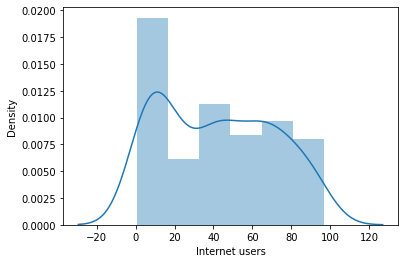

In [19]:
sns.distplot(df['Internet users'])

Количество столбцов гистограммы легко увеличить:

<AxesSubplot:xlabel='Internet users', ylabel='Density'>

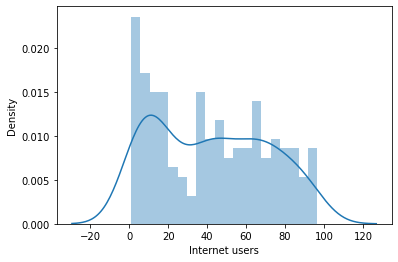

In [20]:
sns.distplot(df['Internet users'], bins = 20)

Взаимосвязь между средним уровнем дохода и уровнем рождаемости визуализировать легко следующим образом:

<AxesSubplot:xlabel='Income Group', ylabel='Birth rate'>

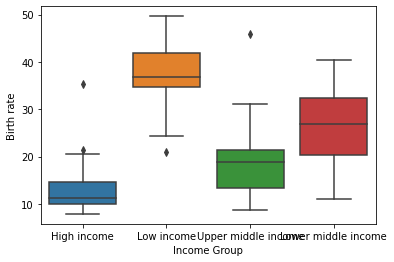

In [21]:
sns.boxplot(data = df, x = 'Income Group', y = 'Birth rate')

Вот один из способов представить графически связь между количеством пользователей сети интернет
и уровнем рождаемости: 

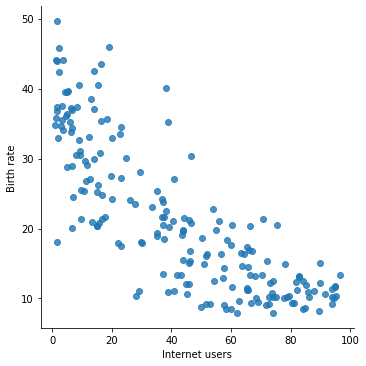

In [22]:
sns.lmplot(data = df, x = 'Internet users', y = 'Birth rate', fit_reg = False)

Ещё один способ сделать это, учитывая также и средний уровень дохода. Увеличим ещё и масштаб:

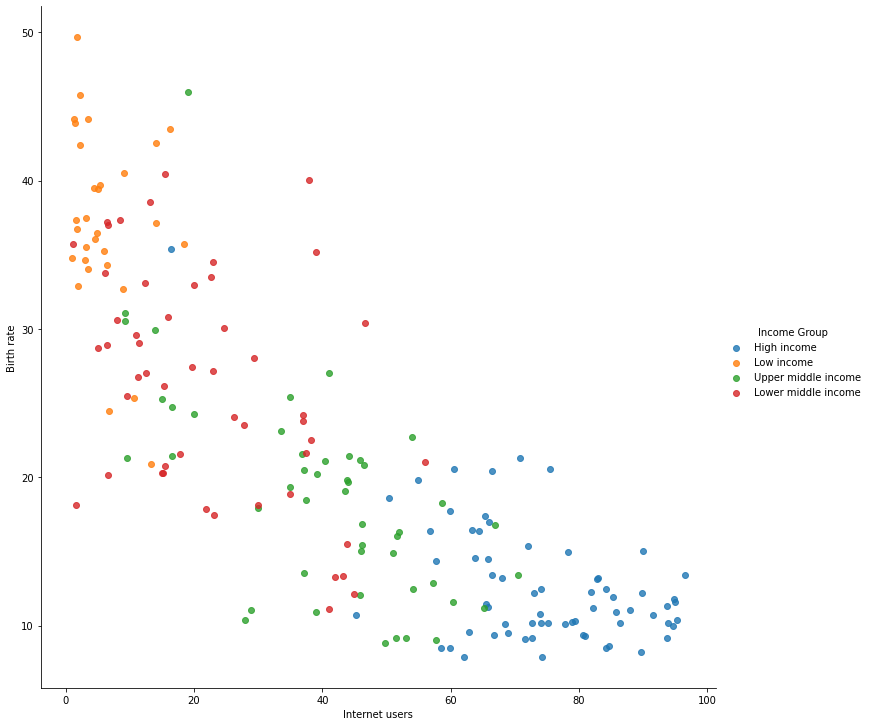

In [23]:
sns.lmplot(data = df, x = 'Internet users', y = 'Birth rate', fit_reg = False,
           hue = 'Income Group', height = 10)